# English Wikipedia page views
## Sample API code
This code is made available for re-use under a [CC0 license](https://creativecommons.org/share-your-work/public-domain/cc0/). 

This is based on [a notebook](https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb) by Jonathan Morgan at UW-Seattle. 

In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2019010100", #YYYYMMDDHH
                    "end" :   '2021090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/staeiou',
    'From': 'stuart@stuartgeiger.com'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [5]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [6]:
example_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010100',
  'views': 258432938},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010200',
  'views': 269669563},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010300',
  'views': 262928832},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010400',
  'views': 257655473},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010500',
  'views': 258422861}]

In [7]:
df = pd.DataFrame(example_monthly_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,user,daily,2019010100,258432938
1,en.wikipedia,all-access,user,daily,2019010200,269669563
2,en.wikipedia,all-access,user,daily,2019010300,262928832
3,en.wikipedia,all-access,user,daily,2019010400,257655473
4,en.wikipedia,all-access,user,daily,2019010500,258422861
...,...,...,...,...,...,...
970,en.wikipedia,all-access,user,daily,2021082800,233546365
971,en.wikipedia,all-access,user,daily,2021082900,252084967
972,en.wikipedia,all-access,user,daily,2021083000,248667495
973,en.wikipedia,all-access,user,daily,2021083100,239193347


In [8]:
df = df[['timestamp','views']]

In [9]:
pd.to_datetime(df['timestamp'], format="%Y%m%d00")

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
970   2021-08-28
971   2021-08-29
972   2021-08-30
973   2021-08-31
974   2021-09-01
Name: timestamp, Length: 975, dtype: datetime64[ns]

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

<ipython-input-10-e391ed13c527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2019-01-01,258432938
2019-01-02,269669563
2019-01-03,262928832
2019-01-04,257655473
2019-01-05,258422861
...,...
2021-08-28,233546365
2021-08-29,252084967
2021-08-30,248667495


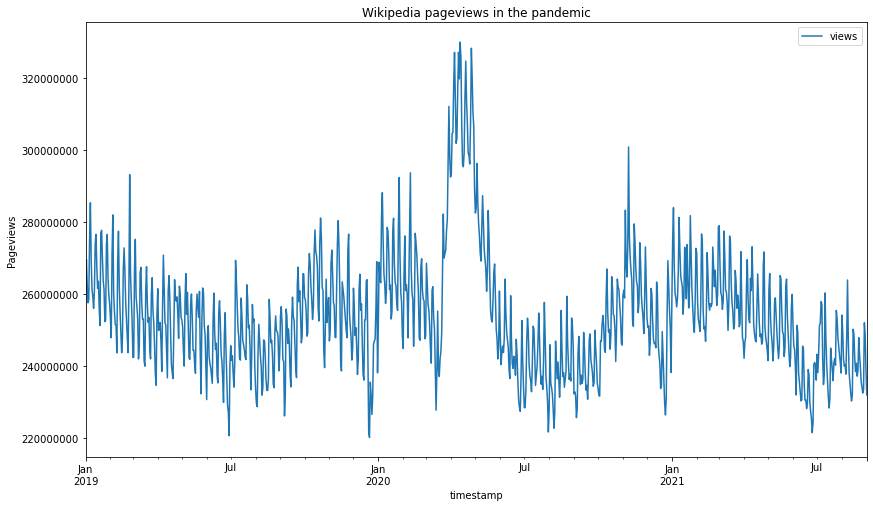

In [16]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)